In [28]:
    #Importing the tensorflow libraries
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout

In [29]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
testdate='202004'
# testdate='2020Q3'
# look_back = 1
# PARTNO ='85-ECT0010'

# look_back = 3 # 87
look_back = 1
PARTNO ='85-EKA0190'

# look_back = 1
# PARTNO ='85-EKA0270'
# look_back = 2
# PARTNO ='85-EMA0130'

# look_back = 2
# PARTNO ='87-WPT1070'

# look_back = 11 #.5022385511111256
# PARTNO ='86-DIA0120'

#array(['85-ECT0010', '85-EKA0190', '85-EKA0270', '85-EMA0130',
    #    '87-WPT1070', '86-DIA0120', '85-EMA0900', '85-EMA0910',
    #    '85-EMA0920'], dtype=object)

In [30]:
# df = pd.read_csv("./data/Parts_EQP_Output_ByMonth_20210407_van.csv")
# df['MFG_MONTH'] = pd.to_datetime(df['MFG_MONTH'].values, format='%Y%m').astype('period[M]')
# df=df[df['PART_NO']==PARTNO] 
# df =df.groupby(['MFG_MONTH']).sum()

 

In [31]:
def fillMissTime():
    df = pd.read_csv("./data/Parts_EQP_Output_ByMonth_20210407_van.csv")
    # df['MFG_MONTH'] = pd.to_datetime(df['MFG_MONTH'].values, format='%Y%m').astype('period[Q]')
    df['MFG_MONTH'] = pd.to_datetime(df['MFG_MONTH'].values, format='%Y%m').astype('period[M]')
    df=df[df['PART_NO']==PARTNO] 
    df =df.groupby(['MFG_MONTH']).sum()
    # df =df[9:] #'85-EKA0190' 前期10筆都是0

    df = df.sort_values(by=['MFG_MONTH'], ascending=[True])
    df.reindex(pd.period_range(df.index[0],df.index[-1],freq='M'))

    df = df.reset_index()
    df.drop(columns=['PM','TS','ENG','NST'],inplace=True)
    
    return df[df['MFG_MONTH']<=testdate]  ,df[df['MFG_MONTH']>testdate]     


In [32]:
def accsum(def_result,target_cols):
        _accsum=0 
        for index,row in def_result.iterrows():
            #避免當分母為0 會無法計算
            if row[target_cols]==0 and row['Predict']==0 :
                row[target_cols] =1
                row['Predict'] =1
            elif row[target_cols] ==0 and row['Predict']!=0:
                row[target_cols]  =0.00001

            if row[target_cols] <0 :
                row[target_cols]  =0.00001

            if row['Predict'] <0 :
                row['Predict']  =0 

            if 1- abs((row['Predict'] - row[target_cols])/row[target_cols] ) >0 : 
                _accsum+=(1- abs((row['Predict'] - row[target_cols])/row[target_cols] ))
        
        return round(_accsum*100/def_result.shape[0],2)

In [33]:
def buildModel():
    #Building the RNN
    #Importing the tensorflow libraries
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout

    #Initilizing RNN
    LSTMmodel = Sequential()

    #Adding first LSTM Layer and Dropout Regularization
    # LSTMmodel.add(LSTM(units = 50, input_shape = (x_train.shape[1], 1)))
    LSTMmodel.add(LSTM(units = 16, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    # LSTMmodel.add(Dropout(rate = 0.2))

    # #Adding Second LSTM Layer and Dropout Regularization
    # LSTMmodel.add(LSTM(units = 50, return_sequences = True))
    # LSTMmodel.add(Dropout(rate = 0.2))

    # #Adding Third LSTM Layer and Dropout Regularization
    # LSTMmodel.add(LSTM(units = 50, return_sequences = True))
    # LSTMmodel.add(Dropout(rate = 0.2))

    # #Adding fourth LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 16))
    # LSTMmodel.add(Dropout(rate = 0.2))

    #Adding the output Layer
    LSTMmodel.add(Dense(units = 1))

    #Compiling the RNN
    LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error' )
    return LSTMmodel

In [34]:
def buildModel1():
     #Initilizing RNN
    LSTMmodel = Sequential()
    # # LSTMmodel.add(LSTM(units = 50,  input_shape = (x_train.shape[1], 1)))
    #Adding first LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
    
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding Second LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50, return_sequences = True))
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding Third LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50, return_sequences = True))
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding fourth LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50))
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding the output Layer
    # LSTMmodel.add(Dense(units = 1))
    LSTMmodel.add(Dense(1, activation = "tanh"))

    #Compiling the RNN
    # LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error'   , metrics = ['mse', 'mae', 'mape'])   
   
    LSTMmodel.compile(optimizer = tf.keras.optimizers.Adam(0.001),  loss = 'mean_squared_error'   , metrics = ['mse', 'mae', 'mape'])   
    return LSTMmodel

In [35]:
def buildModel2():
     #Initilizing RNN
    LSTMmodel = Sequential()
    # # LSTMmodel.add(LSTM(units = 50,  input_shape = (x_train.shape[1], 1)))
    #Adding first LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding Second LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50, return_sequences = True))
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding Third LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50, return_sequences = True))
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding fourth LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50))
    LSTMmodel.add(Dropout(rate = 0.2))

    #Adding the output Layer
    LSTMmodel.add(Dense(units = 1))
 

    #Compiling the RNN
    # LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error'   , metrics = ['mse', 'mae', 'mape'])   
   
    LSTMmodel.compile(optimizer = tf.keras.optimizers.Adam(0.001),  loss = 'mean_squared_error'   , metrics = ['mse', 'mae', 'mape'])   
    return LSTMmodel

In [36]:
def buildModel_softsign():
    #Building the RNN


    #Initilizing RNN
    LSTMmodel = Sequential()

    #Adding first LSTM Layer and Dropout Regularization
    # LSTMmodel.add(LSTM(units = 50, input_shape = (x_train.shape[1], 1)))
    LSTMmodel.add(LSTM(units = 50, return_sequences = True,activation='softsign',dropout=0.5,input_shape = (x_train.shape[1], 1)))
    # LSTMmodel.add(Dropout(rate = 0.2))

    #Adding Second LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50, return_sequences = True,activation='softsign',dropout=0.2))
    # LSTMmodel.add(Dropout(rate = 0.2))

    #Adding Third LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 50, return_sequences = True,activation='softsign',dropout=0.2))
    # LSTMmodel.add(Dropout(rate = 0.2))

    # #Adding fourth LSTM Layer and Dropout Regularization
    LSTMmodel.add(LSTM(units = 16,activation='softsign',dropout=0.2))
    # LSTMmodel.add(Dropout(rate = 0.2))

    #Adding the output Layer
    LSTMmodel.add(Dense(units = 1))

    #Compiling the RNN
    LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error' )
    return LSTMmodel

In [37]:

#Importing the Training Dataset
# train = pd.read_csv('./LSTMDATA/Google_Stock_Price_Train.csv') # 1258
train ,test = fillMissTime() # 72 ,3
print(train.shape,test.shape)
training_set = train.iloc[:, 1:2].values # -1:63  none:64

#Featuring Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
scaled_training_data = sc.fit_transform(training_set)

#Creating Data Structure with 60 Time Stamps and 1 output
x_train = []
y_train = []

# for i in range(look_back,train.shape[0]):
for i in range(look_back,training_set.shape[0]):
    x_train.append(scaled_training_data[i-look_back:i, 0])
    y_train.append(scaled_training_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(len(x_train))



#Building the RNN
#Importing the tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# #Initilizing RNN
# LSTMmodel = Sequential()

# #Adding first LSTM Layer and Dropout Regularization
# # LSTMmodel.add(LSTM(units = 50, input_shape = (x_train.shape[1], 1)))
# LSTMmodel.add(LSTM(units = 16, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# # LSTMmodel.add(Dropout(rate = 0.2))

# # #Adding Second LSTM Layer and Dropout Regularization
# # LSTMmodel.add(LSTM(units = 50, return_sequences = True))
# # LSTMmodel.add(Dropout(rate = 0.2))

# # #Adding Third LSTM Layer and Dropout Regularization
# # LSTMmodel.add(LSTM(units = 50, return_sequences = True))
# # LSTMmodel.add(Dropout(rate = 0.2))

# # #Adding fourth LSTM Layer and Dropout Regularization
# LSTMmodel.add(LSTM(units = 16))
# # LSTMmodel.add(Dropout(rate = 0.2))

# #Adding the output Layer
# LSTMmodel.add(Dense(units = 1))

# #Compiling the RNN
# LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error' )

# # # ----------------
# # # 无状态
# # if STATELESS:
# #     # stateless
# #     model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
# #             validation_data=(Xtest, Ytest),
# #             shuffle=False)

# # # 有状态
# # else:
# #     # 将训练和测试数据设为BATCH_SIZE的倍数
# #     train_size = (Xtrain.shape[0] // BATCH_SIZE) * BATCH_SIZE
# #     test_size = (Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
# #     Xtrain, Ytrain = Xtrain[0:train_size], Ytrain[0:train_size]
# #     Xtest, Ytest = Xtest[0:test_size], Ytest[0:test_size]
# #     print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
# #     for i in range(NUM_EPOCHS):
# #         print("Epoch {:d}/{:d}".format(i+1, NUM_EPOCHS))
# #         model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=1,
# #                 validation_data=(Xtest, Ytest),
# #                 shuffle=False)
# #         model.reset_states()

# # model_score, _ = LSTMmodel.evaluate(Xtest, Ytest, batch_size=1)
# # rmse = math.sqrt(model_score)
# # print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))


# # ------------------
# #Fitting the RNN to the Training Set
# # early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
# LSTMmodel = buildModel_softsign()
LSTMmodel =buildModel1()
history_lstm_model = LSTMmodel.fit(x_train, y_train, epochs = 100, batch_size = 16,verbose = 1 ,shuffle=True)



# lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

#Making the predictions and visulization

#Getting the real stock price of google
# test = pd.read_csv('./LSTMDATA/Google_Stock_Price_Test.csv')
# real_stock_price = test.iloc[:, 1:2].values
real_test_price = test['QTY'].iloc[:].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((train['QTY'], test['QTY']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - look_back:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(look_back, inputs.shape[0]):
    X_test.append(inputs[i-look_back:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
testPredict = LSTMmodel.predict(X_test)
testPredict = sc.inverse_transform(testPredict)







(64, 2) (11, 2)
63
Train on 63 samples
Epoch 1/100
63/63 [==============================] - 10s 162ms/sample - loss: 0.4702 - mse: 0.4702 - mae: 0.6195 - mape: 453852.0625
Epoch 2/100
63/63 [==============================] - 0s 524us/sample - loss: 0.4534 - mse: 0.4534 - mae: 0.6099 - mape: 2814544.5000
Epoch 3/100
63/63 [==============================] - 0s 524us/sample - loss: 0.4338 - mse: 0.4338 - mae: 0.5979 - mape: 4730531.5000
Epoch 4/100
63/63 [==============================] - 0s 444us/sample - loss: 0.4134 - mse: 0.4134 - mae: 0.5857 - mape: 7442744.0000
Epoch 5/100
63/63 [==============================] - 0s 460us/sample - loss: 0.3870 - mse: 0.3870 - mae: 0.5680 - mape: 9825922.0000
Epoch 6/100
63/63 [==============================] - 0s 619us/sample - loss: 0.3583 - mse: 0.3583 - mae: 0.5484 - mape: 13224359.0000
Epoch 7/100
63/63 [==============================] - 0s 571us/sample - loss: 0.3225 - mse: 0.3225 - mae: 0.5214 - mape: 16145938.0000
Epoch 8/100
63/63 [=========

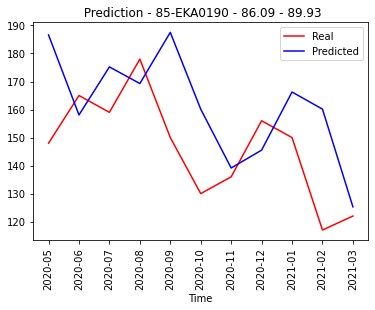

In [38]:
test['Predict']=testPredict
_score_month = accsum(test,'QTY')
# Visualising the results
t = test['MFG_MONTH'].astype(str).to_numpy() 
plt.plot(t,real_test_price, color = 'red', label = 'Real')
plt.plot(t,testPredict, color = 'blue', label = 'Predicted')
_score =round((1- abs(testPredict.sum() -real_test_price.sum())/real_test_price.sum())*100,2)
plt.title(' Prediction - {0} - {1} - {2}'.format(PARTNO,_score_month,_score))
plt.xlabel('Time')
plt.xticks(rotation=90)    
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


#-----------------------------
trainPredict = LSTMmodel.predict(x_train)
trainPredict = sc.inverse_transform(trainPredict)
# train['Predict']=trainPredict
# _score_month_train = accsum(train,'QTY')
# print("train acc:",_score_month_train)
# print("test acc:",_score_month)


In [39]:
# train.shape[0]
# scaled_training_data.shape
# x_train.shape
# testPredict.shape
# len(dataset_total)
# len(trainPredict)+(look_back)

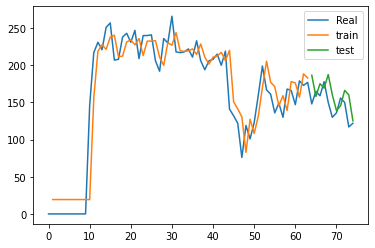

In [40]:
# 畫訓練資料趨勢圖
# shift train predictions for plotting

dataset_total = dataset_total.values.reshape(-1,1)
trainPredictPlot = np.empty_like(dataset_total, dtype=float)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# trainPredictPlot
# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_total, dtype=float)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset_total), :] = testPredict

# 畫原始資料趨勢圖
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(inputs))
plt.plot(dataset_total, label = 'Real')
plt.plot(trainPredictPlot ,label = 'train')
plt.plot(testPredictPlot ,label = 'test')
plt.legend()
 
plt.show()
#------------------------

In [41]:
df = pd.DataFrame({'A':[1,2,3],
                   'B':[4,5,6],
                   'C':[7,8,9],
                   'D':[1,3,5],
                   'E':[5,3,6],
                   'F':[7,4,3]})

print ("df",df)
print()
print("df.iloc[:, :-1]",df.iloc[:, :-1]) # 作編少一列
print()
print("df.iloc[:-1:, :]",df.iloc[:-1:, :]) # 不撈最後一行

print()
print("df.iloc[1:, :]",df.iloc[1:, :]) # 不撈最後一行

X = df.iloc[:, :-1].values
print()
print ("X = df.iloc[:, :-1].values",X)
 

 
 

df    A  B  C  D  E  F
0  1  4  7  1  5  7
1  2  5  8  3  3  4
2  3  6  9  5  6  3

df.iloc[:, :-1]    A  B  C  D  E
0  1  4  7  1  5
1  2  5  8  3  3
2  3  6  9  5  6

df.iloc[:-1:, :]    A  B  C  D  E  F
0  1  4  7  1  5  7
1  2  5  8  3  3  4

df.iloc[1:, :]    A  B  C  D  E  F
1  2  5  8  3  3  4
2  3  6  9  5  6  3

X = df.iloc[:, :-1].values [[1 4 7 1 5]
 [2 5 8 3 3]
 [3 6 9 5 6]]
